In [1]:
import nest_asyncio
import numpy as np
import matplotlib.pyplot as plt

from benchmark.application import app, types, config
from benchmark.application.types import BenchmarkParams

nest_asyncio.apply()

benchmark_types = [types.BenchmarkTypes.API, types.BenchmarkTypes.MSG]
batch_list = [2**i for i in range(11)]

bench_param_list = [
    BenchmarkParams(
        benchmark_type = bench_type,
        complexity_factor = 100,
        memory_overhead = 0,
        requests_number = 1024,
        batch_size = batch_size,
        total_progress=True,
    ) for bench_type in benchmark_types for batch_size in batch_list
]

results = [app.run_benchmark(param, config.Env.DOCKER) for param in bench_param_list]

Total:   0%|          | 0/1024 [00:00<?, ?it/s]

Total:   0%|          | 0/1024 [00:00<?, ?it/s]

Total:   0%|          | 0/1024 [00:00<?, ?it/s]

Total:   0%|          | 0/1024 [00:00<?, ?it/s]

Total:   0%|          | 0/1024 [00:00<?, ?it/s]

Total:   0%|          | 0/1024 [00:00<?, ?it/s]

Total:   0%|          | 0/1024 [00:00<?, ?it/s]

Total:   0%|          | 0/1024 [00:00<?, ?it/s]

Total:   0%|          | 0/1024 [00:00<?, ?it/s]

Total:   0%|          | 0/1024 [00:00<?, ?it/s]

Total:   0%|          | 0/1024 [00:00<?, ?it/s]

Total:   0%|          | 0/1024 [00:00<?, ?it/s]

Total:   0%|          | 0/1024 [00:00<?, ?it/s]

Total:   0%|          | 0/1024 [00:00<?, ?it/s]

Total:   0%|          | 0/1024 [00:00<?, ?it/s]

Total:   0%|          | 0/1024 [00:00<?, ?it/s]

Total:   0%|          | 0/1024 [00:00<?, ?it/s]

Total:   0%|          | 0/1024 [00:00<?, ?it/s]

Total:   0%|          | 0/1024 [00:00<?, ?it/s]

Total:   0%|          | 0/1024 [00:00<?, ?it/s]

Total:   0%|          | 0/1024 [00:00<?, ?it/s]

Total:   0%|          | 0/1024 [00:00<?, ?it/s]

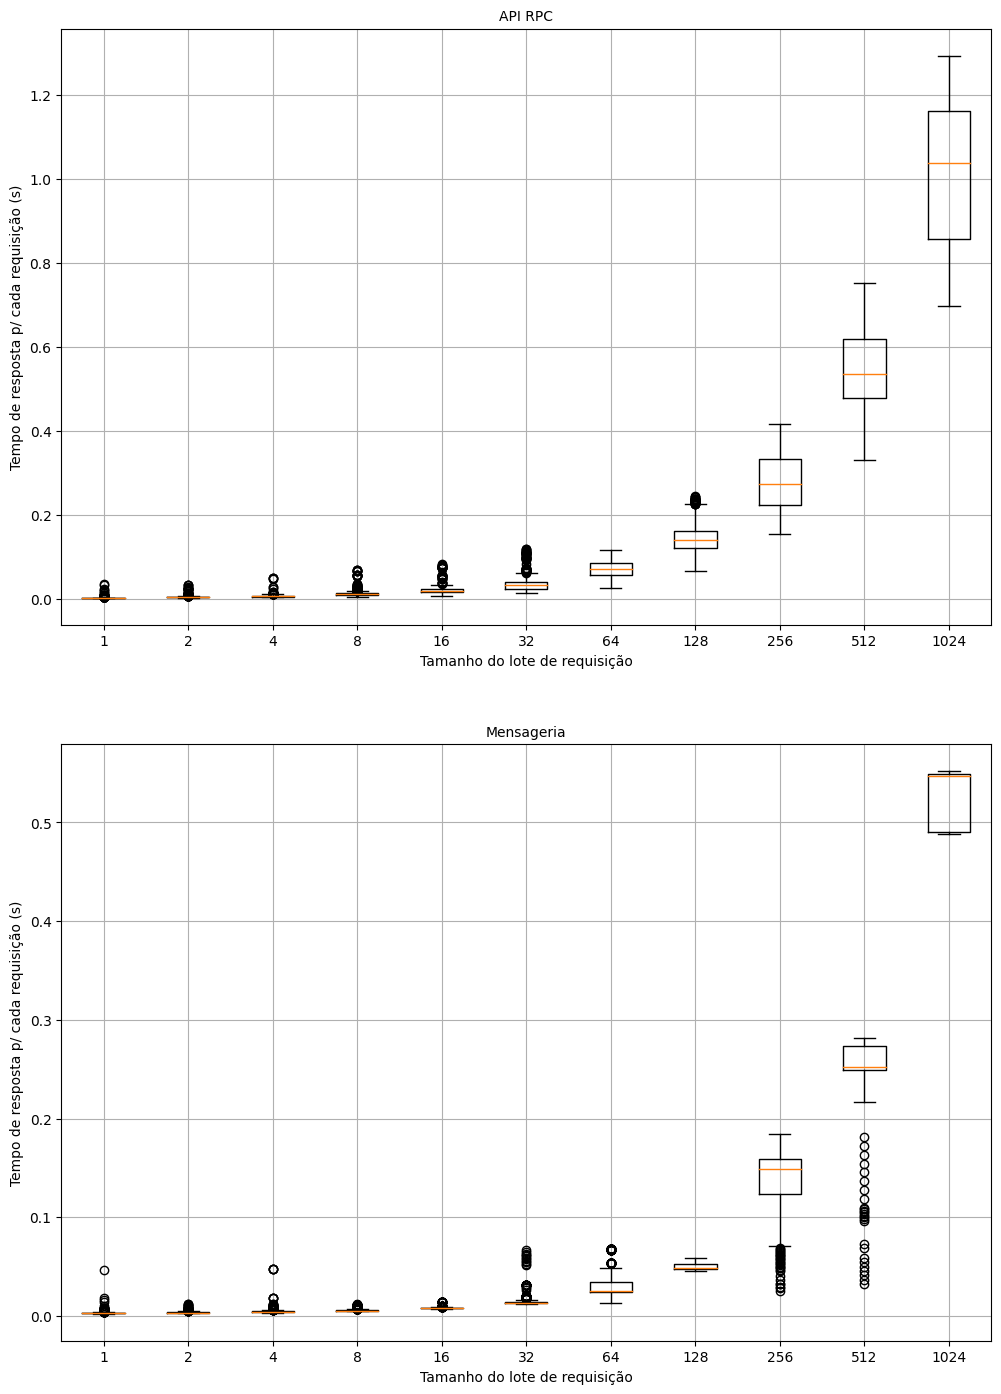

In [71]:
elapsed_times = [[t.end - t.start for t in result.response_list] for result in results]

fig, axs = plt.subplots(nrows=2, figsize=(12, 16))

axs[0].boxplot(elapsed_times[:len(batch_list)], labels=batch_list)
axs[0].set_title("API RPC", fontsize=10)
# axs[0].plot(
#     axs[0].get_xticks(), [result.elapsed_time for result in results[:len(batch_list)]], 'o--b', label="Tempo total"
# )
# axs[0].legend()
axs[0].set_xlabel("Tamanho do lote de requisição")
axs[0].set_ylabel("Tempo de resposta p/ cada requisição (s)")
axs[0].grid(True)

axs[1].boxplot(elapsed_times[len(batch_list):], labels=batch_list)
axs[1].set_title("Mensageria", fontsize=10)
# axs[1].plot(
#     axs[1].get_xticks(), [result.elapsed_time for result in results[len(batch_list):]], 'o--b', label="Tempo total"
# )
# axs[1].legend()
axs[1].set_xlabel("Tamanho do lote de requisição")
axs[1].set_ylabel("Tempo de resposta p/ cada requisição (s)")
axs[1].grid(True)

fig.subplots_adjust(top=0.93, hspace=.2, wspace=.2)


plt.show()

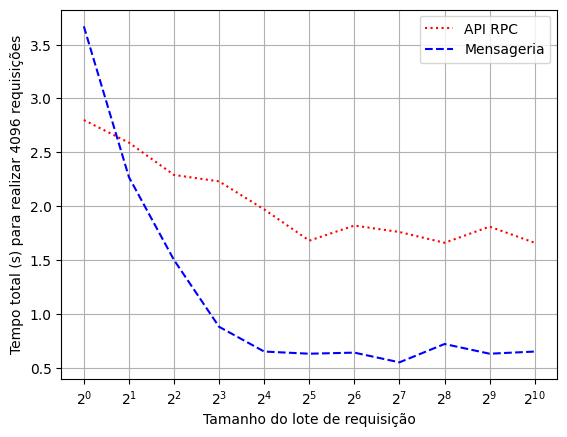

In [77]:
plt.plot(batch_list, [result.elapsed_time for result in results[:len(batch_list)]], ':r', label="API RPC")
plt.plot(batch_list, [result.elapsed_time for result in results[len(batch_list):]], '--b', label="Mensageria")

plt.legend()
plt.xlabel("Tamanho do lote de requisição")
plt.ylabel("Tempo total (s) para realizar 4096 requisições")

plt.grid(True)
plt.xscale('log', base=2)
plt.xticks(batch_list)
plt.show()

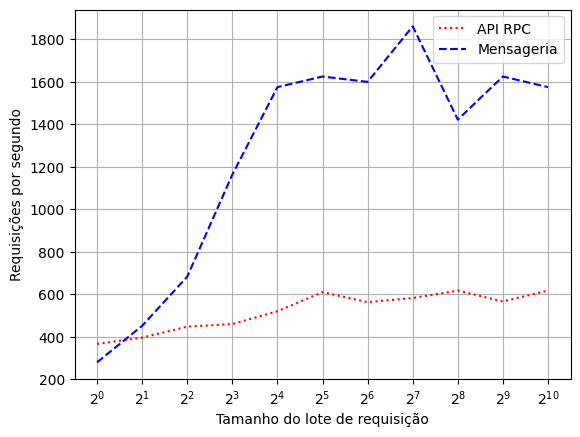

In [78]:
def get_requests_per_second(results):
    return [len(result.response_list)/result.elapsed_time for result in results]

plt.plot(batch_list, get_requests_per_second(results[:len(batch_list)]), ':r', label="API RPC")
plt.plot(batch_list, get_requests_per_second(results[len(batch_list):]), '--b', label="Mensageria")

plt.legend()
plt.xlabel("Tamanho do lote de requisição")
plt.ylabel("Requisições por segundo")

plt.grid(True)
plt.xscale('log', base=2)
plt.xticks(batch_list)
plt.show()

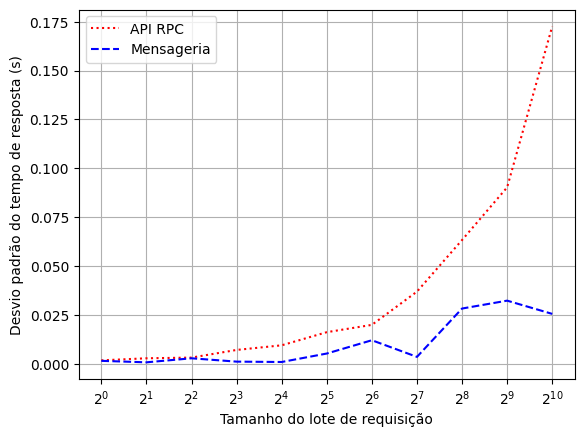

In [79]:
def get_standard_deviation(results):
    return [np.std(np.asarray(result)) for result in results]

plt.plot(
    batch_list, get_standard_deviation(elapsed_times[: len(batch_list)]), ':r', label="API RPC"
)
plt.plot(
    batch_list, get_standard_deviation(elapsed_times[len(batch_list) :]), '--b', label="Mensageria"
)

plt.legend()
plt.xlabel("Tamanho do lote de requisição")
plt.ylabel("Desvio padrão do tempo de resposta (s)")

plt.grid(True)
plt.xscale("log", base=2)
plt.xticks(batch_list)
plt.show()
